In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
data=pd.read_csv("../data/Train.csv")
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [55]:
data.drop(data.columns[[0]], axis=1, inplace=True)

In [56]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [57]:
# data=pd.get_dummies(data,columns=['Mode_of_Shipment','Product_importance','Gender','Customer_care_calls','Customer_rating', # 데이터 원-핫 인코딩
#                                   'Prior_purchases'])
data["customerscore"]=np.nan # 고객 점수 초기화
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,customerscore
0,D,Flight,4,2,177,3,low,F,44,1233,1,NaN
1,F,Flight,4,5,216,2,low,M,59,3088,1,NaN
2,A,Flight,2,2,183,4,low,M,48,3374,1,NaN
3,B,Flight,3,3,176,4,medium,M,10,1177,1,NaN
4,C,Flight,2,2,184,3,medium,F,46,2484,1,NaN


### 좋은 고객 등급 보유 (Having good Customer Rating)

In [58]:
good_rating=data.query('Customer_rating>=3')

In [59]:
good_rating

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,customerscore
1,F,Flight,4,5,216,2,low,M,59,3088,1,NaN
3,B,Flight,3,3,176,4,medium,M,10,1177,1,NaN
6,D,Flight,3,4,250,3,low,F,3,2371,1,NaN
8,A,Flight,3,4,150,3,low,F,11,1861,1,NaN
10,C,Flight,3,4,189,2,medium,M,12,2888,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10987,F,Ship,5,3,242,5,low,F,10,1846,1,NaN
10988,A,Ship,4,3,192,4,low,F,2,1830,0,NaN
10990,C,Ship,5,4,219,6,low,M,3,1098,0,NaN
10996,C,Ship,5,4,242,5,low,F,4,1155,0,NaN


In [60]:
data.rename(columns={"Reached.on.Time_Y.N": "Reached_on_Time"},inplace=True)

### 제시간에 도착한 상품 (Product Reached on Time)

In [61]:
data['Reached_on_Time'].value_counts(normalize=True) * 100

Reached_on_Time
1    59.669061
0    40.330939
Name: proportion, dtype: float64

### 좋은 고객 등급 및 배송 수령 시간 그래프 (Plot of good Customer rating + shipment received time)

In [62]:
# import seaborn as sns # 시각화 라이브러리 임포트
# ax =sns.countplot(x="Reached_on_Time",data=good_rating, palette="icefire",hue="Reached_on_Time")
# plt.ylabel("고객 수")
# plt.title("약 39.7%의 고객이 제시간에 배송을 받았습니다")

# ax.text(-0.9, 4600, '3점 이상의 등급을 매긴 고객 식별',fontsize=20,color='red')
# count=good_rating['Reached_on_Time'].value_counts()
# print(count)

# good_rating['Reached_on_Time'].value_counts(normalize=True)*100

In [63]:
totalcost = data['Cost_of_the_Product'].sum()
print (totalcost)

2311955


In [64]:
countorder=data['Cost_of_the_Product'].count()
print(countorder)

10999


In [65]:
avg=totalcost/countorder
print(avg)

210.19683607600692


### 고객 점수 (Customer Score)

In [66]:
a=[]
for value in data['Prior_purchases']: 
    a.append(avg*value)
data['customerscore']=a
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time,customerscore
0,D,Flight,4,2,177,3,low,F,44,1233,1,630.590508
1,F,Flight,4,5,216,2,low,M,59,3088,1,420.393672
2,A,Flight,2,2,183,4,low,M,48,3374,1,840.787344
3,B,Flight,3,3,176,4,medium,M,10,1177,1,840.787344
4,C,Flight,2,2,184,3,medium,F,46,2484,1,630.590508


In [67]:
data['customerscore'].median()

np.float64(630.5905082280208)

In [68]:
goodscore=data.query('customerscore>=630')

Reached_on_Time
1    4938
0    3462
Name: count, dtype: int64


Reached_on_Time
1    58.785714
0    41.214286
Name: proportion, dtype: float64

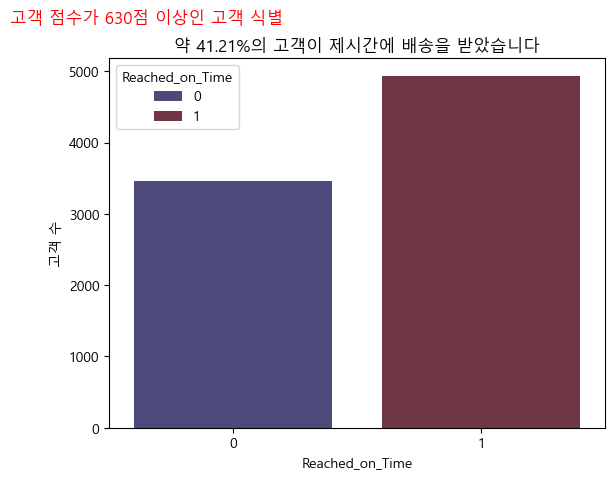

In [69]:
ax = sns.countplot(x="Reached_on_Time",data=goodscore, palette="icefire",hue="Reached_on_Time")
plt.ylabel("고객 수")
plt.title("약 41.21%의 고객이 제시간에 배송을 받았습니다")

ax.text(-0.9, 5690, '고객 점수가 630점 이상인 고객 식별',fontsize=12,color='red')
count1=goodscore['Reached_on_Time'].value_counts()
print(count1)
goodscore['Reached_on_Time'].value_counts(normalize=True)*100

### 고객별 이전 구매 횟수 (Prior purchased by Customer)

In [70]:
recurringorder=data.query('Prior_purchases>=6')
recurringorder

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time,customerscore
37,F,Ship,2,4,181,6,medium,F,16,3605,1,1261.181016
62,A,Ship,5,1,105,6,medium,M,62,1292,1,1261.181016
74,A,Ship,6,1,238,6,low,F,13,2442,1,1261.181016
90,D,Ship,5,3,174,6,high,F,41,1085,1,1261.181016
133,F,Flight,5,4,280,6,medium,F,51,3582,1,1261.181016
...,...,...,...,...,...,...,...,...,...,...,...,...
10981,F,Ship,5,2,251,6,low,M,10,1196,0,1261.181016
10983,B,Ship,4,3,229,6,medium,M,1,1235,1,1261.181016
10990,C,Ship,5,4,219,6,low,M,3,1098,0,1261.181016
10993,F,Ship,5,1,257,6,low,F,1,1150,0,1261.181016


Reached_on_Time
1    591
0    412
Name: count, dtype: int64


Reached_on_Time
1    58.92323
0    41.07677
Name: proportion, dtype: float64

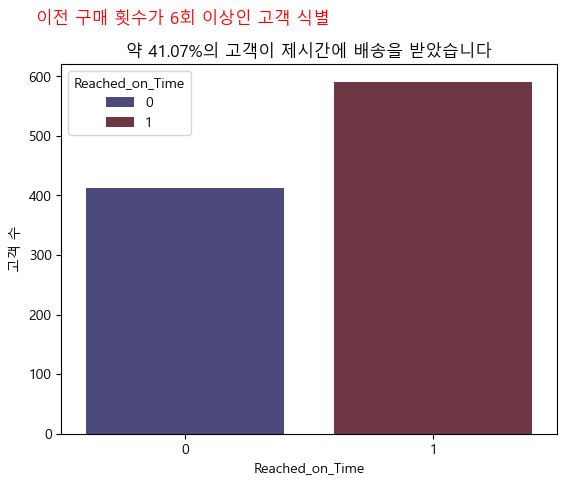

In [71]:
ax = sns.countplot(x="Reached_on_Time",data=recurringorder, palette="icefire",hue="Reached_on_Time")
plt.ylabel("고객 수")
plt.title("약 41.07%의 고객이 제시간에 배송을 받았습니다")
ax.text(-0.6, 690, '이전 구매 횟수가 6회 이상인 고객 식별',fontsize=12,color='red')
count2=recurringorder['Reached_on_Time'].value_counts()
print(count2)
recurringorder['Reached_on_Time'].value_counts(normalize=True)*100

### 최고 결제 금액 구매자 (Highest Payment Buyers)

In [72]:
data["Cost_of_the_Product"].max()

np.int64(310)

In [73]:
data["Cost_of_the_Product"].min()

np.int64(96)

In [74]:
medianvalue=data["Cost_of_the_Product"].median()

In [75]:
print(medianvalue)

214.0


In [76]:
higestpayment=data.query('Cost_of_the_Product>=214')

Reached_on_Time
1    3136
0    2408
Name: count, dtype: int64


Reached_on_Time
1    56.565657
0    43.434343
Name: proportion, dtype: float64

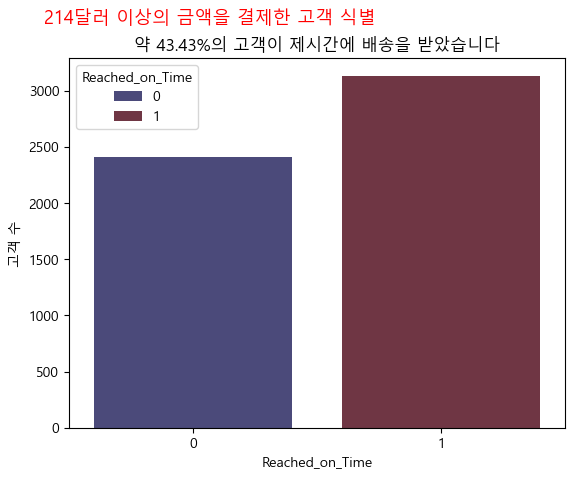

In [77]:
ax = sns.countplot(x="Reached_on_Time",data=higestpayment, palette="icefire",hue="Reached_on_Time")
plt.ylabel("고객 수")
plt.title("약 43.43%의 고객이 제시간에 배송을 받았습니다")
ax.text(-0.6, 3600, '214달러 이상의 금액을 결제한 고객 식별',fontsize=13,color='red')
count3=higestpayment['Reached_on_Time'].value_counts()
print(count3)
higestpayment['Reached_on_Time'].value_counts(normalize=True)*100

### 가치 있는 고객 (Valuble Customer)

In [78]:
mostvaluablecustomer=data[(data['Customer_rating'] >= 3)&(data['Prior_purchases']>=6)&(data['Cost_of_the_Product']>=214)&(data['customerscore']>=data['customerscore'].median())]

Reached_on_Time
1    172
0    156
Name: count, dtype: int64


Reached_on_Time
1    52.439024
0    47.560976
Name: proportion, dtype: float64

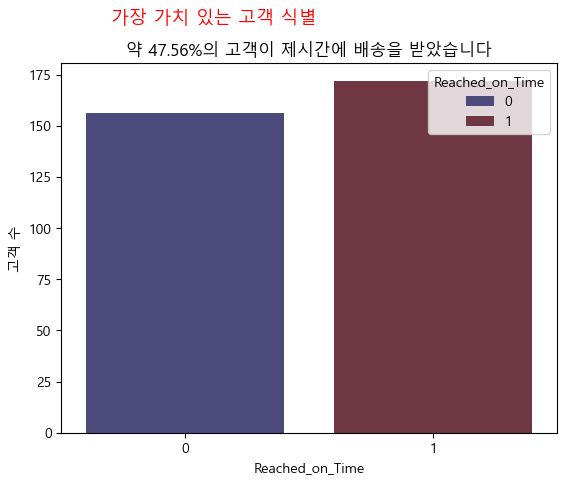

In [79]:
ax = sns.countplot(x="Reached_on_Time",data=mostvaluablecustomer, palette="icefire",hue="Reached_on_Time")
plt.ylabel("고객 수")
plt.title("약 47.56%의 고객이 제시간에 배송을 받았습니다")
ax.text(-0.3, 200, '가장 가치 있는 고객 식별',fontsize=13,color='red')
count4=mostvaluablecustomer['Reached_on_Time'].value_counts()
print(count4)
mostvaluablecustomer['Reached_on_Time'].value_counts(normalize=True)*100

# 기본 시각화 (Basic Visulaization)

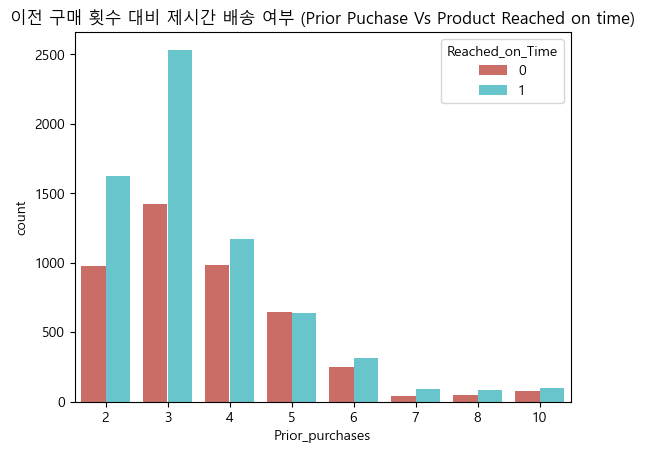

In [80]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Prior_purchases", data = data, palette = "hls",hue="Reached_on_Time");
plt.title('이전 구매 횟수 대비 제시간 배송 여부 (Prior Puchase Vs Product Reached on time)')
plt.show()

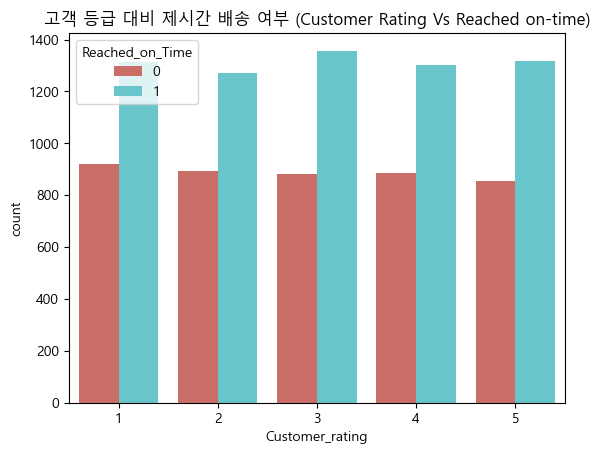

In [81]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Customer_rating", data = data, palette = "hls",hue="Reached_on_Time");
plt.title('고객 등급 대비 제시간 배송 여부 (Customer Rating Vs Reached on-time)')
plt.show()

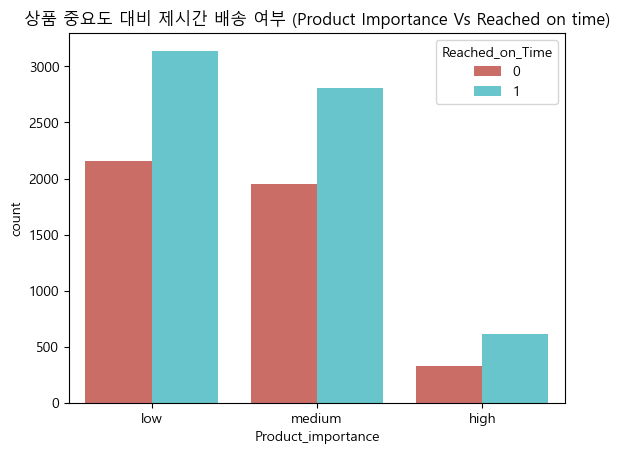

In [82]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Product_importance", data = data, palette = "hls",hue="Reached_on_Time");
plt.title('상품 중요도 대비 제시간 배송 여부 (Product Importance Vs Reached on time)')
plt.show()

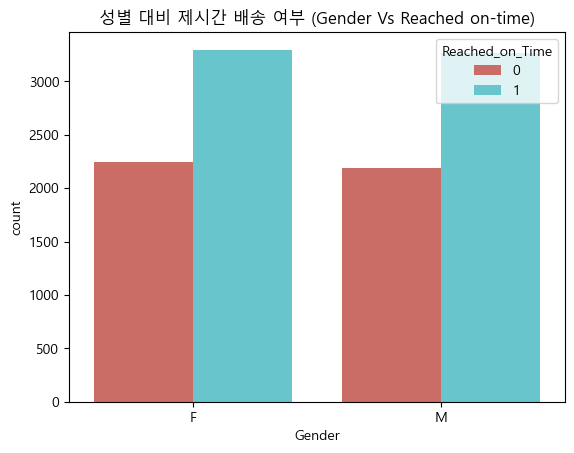

In [83]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Gender", data = data, palette = "hls",hue="Reached_on_Time");
plt.title('성별 대비 제시간 배송 여부 (Gender Vs Reached on-time)')
plt.show()

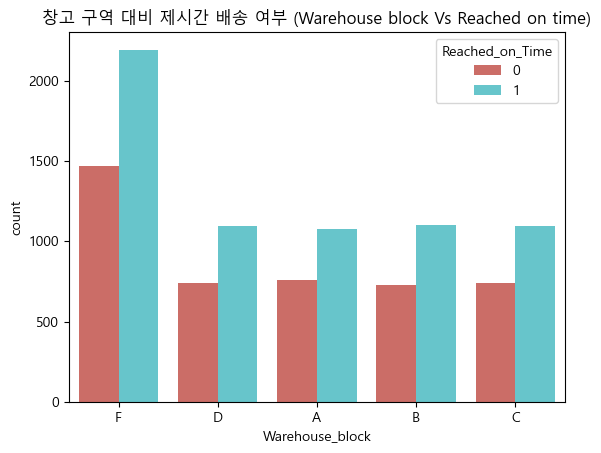

In [84]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Warehouse_block", data = data, palette = "hls",hue="Reached_on_Time",order = data['Warehouse_block'].value_counts().index);
plt.title('창고 구역 대비 제시간 배송 여부 (Warehouse block Vs Reached on time)')
plt.show()

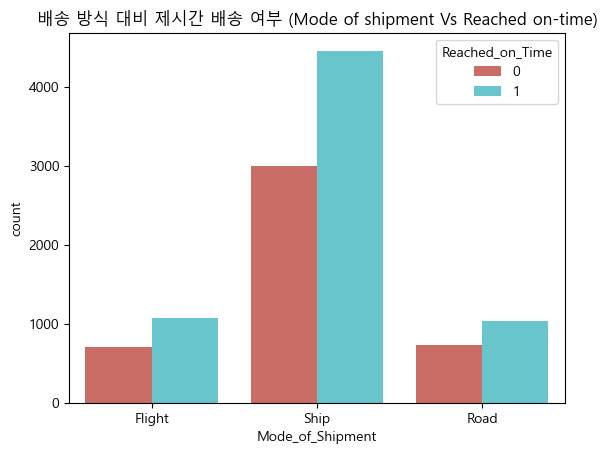

In [85]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Mode_of_Shipment", data = data, palette = "hls",hue="Reached_on_Time");
plt.title('배송 방식 대비 제시간 배송 여부 (Mode of shipment Vs Reached on-time)')
plt.show()

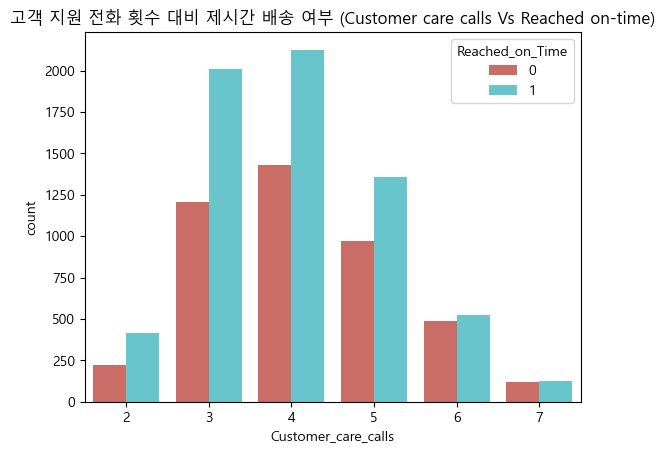

In [86]:
sb.countplot(x = "Customer_care_calls", data = data, palette = "hls",hue="Reached_on_Time");
plt.title('고객 지원 전화 횟수 대비 제시간 배송 여부 (Customer care calls Vs Reached on-time)')
plt.show()